# Modifying Dataframes and Further Visualisations

## The Dataset
This dataset is based on citizen's reports to FixMyStreet.com regarding problems with pavements or potholes.For each report there is a category assigned, the longitude and the latitude are provided, as well as some datazone information (name of the datazone and code).

| category | latitude | longitude | datazone | name |
|:-------|:--------|:-------- |:-------- |:-------|
| Potholes | 55.84409 | -4.34629 | S01009815 | Cardonald West and Central - 01 |
| Pavements/footpaths | 55.87155| -4.32769 | S01010391 | Glasgow Harbour and Partick South - 04 |
| Potholes | 55.87056|-4.32029 | S01010391 | Glasgow Harbour and Partick South - 04 |
| ... | ...|... | ... |...|


## Aims 
1.Learn about data processing and explore a dataframe, using the build-in functions for counting + grouping the data

2.Explore geographical visualisation and more standard barchart

## Questions to consider

Are there any areas with particularly bad road conditions? Which ones? 
<br>
Are there any major differences between the city center datazones and the rest?
<br>
What other observations can you make about the data? 

## Concepts covered

1. Further use of panda dataframes: 
 <br>   a. creating new dataframes
   <br> b. use of build-in functions: counting occurences, getting stats about the dataset (min, max, count, quantiles)
2. Processing a dataset in order to create a more structured view
3. Exploring geographical data viausalisations, using gmplot

In [3]:
import pandas as pd
import gmplot
import csv
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Recall: Reading from a csv
In the last time notebook, we learned how to read from a csv file and create a dataframe. 

In [4]:
dataframe = pd.read_csv("data/fix_myStreetGlasgow.csv", sep=',')

### **Task**
Recall some of the dataframe operations covered in the previous notebook, explore this dataframe based on the FixMyStree data for Glasgow. 

In [6]:
#CODE GOES HERE

## Filtering

Based on the data we have it would be nice to quantify the potholes and pavements issues per datazone. In this way we should be able to identify which areas are most problematic. 

Essentially, what we want to achieve is having the results in the following form:

| name | potholes | 
|:-------|:--------|
| Alexandra Parade - 03 | 3 |
| Anderston - 01        | 7 |
| ...                   | ... |

The next few cells will cover the following concepts: 
1. filtering based on a value
2. grouping by a column to obtain a statistic
3. creating a new dataframe

In [46]:
#returns only the rows for which the category is potholes
dataF = dataframe[dataframe['category'] == 'Potholes']

#once we have only the potholes, we want to aggregate the results based on the name of the datazone and count the total number of potholes
dataF = dataF.groupby('name')['category'].count()
#print (dataF)

#Now when we have that, we would lile to store it in a new dataframe
dataPo = pd.DataFrame(data=dataF).rename(index=str, columns={"name": "Datazone", "category": "Potholes"})



### **Task**

Based on the earlier example, create a dataframe, called **dataPav** that contains the datazones and the count of pavements/footpath issues. Follow the steps outlined below if you are stuck: 

1. Filter the data based on whether the value of the 'category' is 'Pavements/footpaths'
2. Group it by 'name' and count the total occurences per datazone
3. Create a new dataframe, called **dataPav**, with columns: 'Datazone' and 'Pavements'


In [ ]:
YOUR CODE GOES HERE

## Concatenating dataframes

Assuming your code for the previous task works, now you should have 2 dataframes: 

1. dataPO: containing 2 columns, the name of the datazone and the count of potholes for that datazone
2. dataPav: containing 2 columns, the name of the datazone and the count of reported pavement problems

Ideally, what we want to do is to have one dataframe that combines the data from dataPo and dataPav. Since the column 'name' is common for the two dataframes, we want to use it to join them together.



In [56]:
dataP = dataframe[dataframe['category'] == 'Pavements/footpaths'].groupby('name')['category'].count()
dataPav= pd.DataFrame(data=dataP).rename(index=str, columns={"name": "Datazone", "category": "Pavements"})

#concatenating the two dataframes
result = pd.concat([dataPo, dataPav], axis=1, join='outer')

### Side Note
What happens when you print the resulting dataframe? 

Sometimes the count value is **NaN** since no problems have been reported for this area. In similar cases, we say we have **missing data**. There are different techniques for dealing with missing data but before we discuss this any further, we can just replace all 'NaN's with 0s instead. 

In [57]:
result = result.fillna(0)


## Creating bargraphs

Recall how in our previous notebook we created a bar graph to compare the protected territories. Here it would be interesting to see how the reported issues accross the datazones compare. 

Here we could do something similar and compare the datazones based on a threshold number of potholes. 

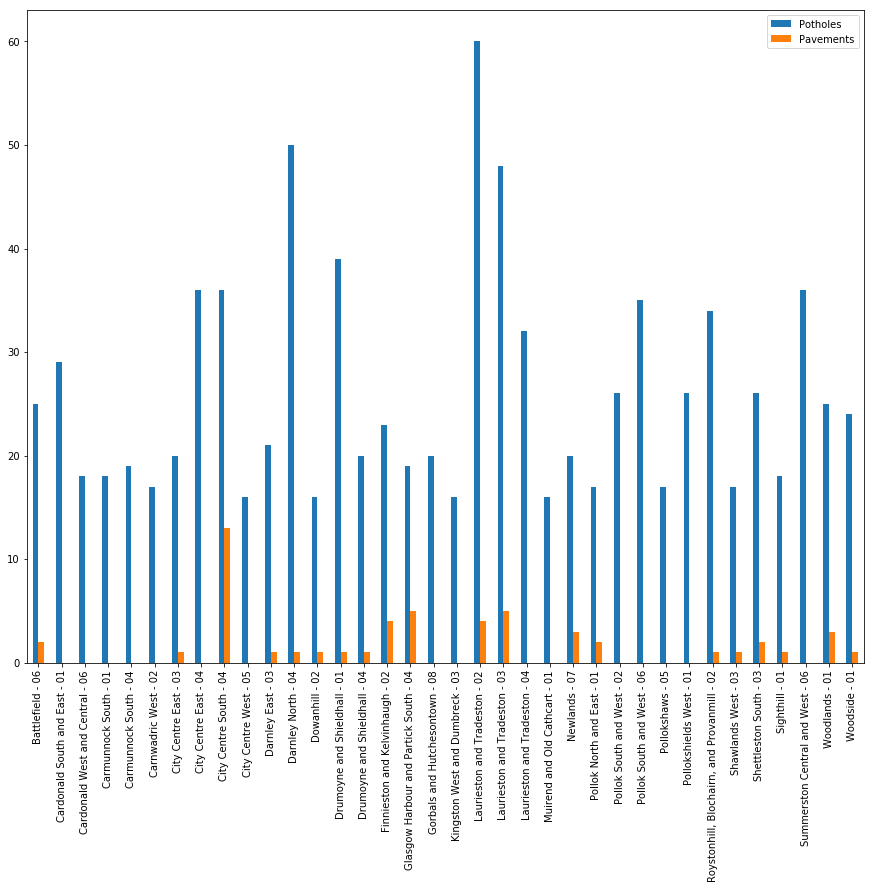

In [67]:
result = result[(result['Potholes']>15.0) | (result['Pavements']>15.0)]
#print (result)
# plot = result[['Potholes','Pavements']].plot(kind='bar', title ="Datazones with reports of potholes or pavements >15", figsize=(15, 10), legend=True, fontsize=14)
# plt.xlabel('Datazones', fontsize=13)
# plt.ylabel('Number of problems reported',fontsize=13)
# plt.show()
result.plot.bar(fontsize=10, figsize=(15,12))

#ax = sns.barplot(x="Datazone", y='Potholes', data=result)

#g = sns.factorplot("Potholes", "Pavements", data=result, kind="bar", palette="muted", legend=False)

### **Task: Create a bar chart yourself**

#TODO come up with a task


## Geographical Visualisation
We have the coordinates of the reported potholes, so another option for exploring the data would be using a geographical map.

### Heatmaps
Heatmaps use colour-coding to represent different values. In our particular case, red would mean zones with many potholes/pavement problems. 


In [43]:
# take the latitudes and longitudes
latitudes = dataframe["latitude"]
longitudes = dataframe["longitude"]

# Creating the location we would like to initialize the focus on. 
# Parameters: Lattitude, Longitude, Zoom
gmap = gmplot.GoogleMapPlotter(55.8721,-4.2882,10)

# Overlay our datapoints onto the map
gmap.heatmap(latitudes, longitudes)

# Generate the heatmap into an HTML file
gmap.draw("Glasgow_heatmap.html")